# Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

<u>To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. </u>

The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around <b>80%</b>.

Goal:
    
1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads.
2. There are some more problems presented by the company which our model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well.


In [399]:
#importing Essential Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [189]:
# libraries
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [190]:
#supressing warnings

import warnings
warnings.filterwarnings('ignore')

In [191]:
#Increasing the columns views limit
pd.options.display.max_columns = None
pd.options.display.max_rows = 150
pd.options.display.float_format = '{:.2f}'.format

In [192]:
#Importing the Dataset

leads = pd.read_csv('Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


In [193]:
#Reading the number of rows and columns present in the dataset
leads.shape



(9240, 37)

In [194]:
#Information of the dataset
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [195]:
#Summary Statistics of the Dataset
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.00,9240.00,9103.00,9240.00,9103.00,5022.00,5022.00
mean,617188.44,0.39,3.45,487.70,2.36,14.31,16.34
std,23406.00,0.49,4.85,548.02,2.16,1.39,1.81
min,579533.00,0.00,0.00,0.00,0.00,7.00,11.00
25%,596484.50,0.00,1.00,12.00,1.00,14.00,15.00
50%,615479.00,0.00,3.00,248.00,2.00,14.00,16.00
75%,637387.25,1.00,5.00,936.00,3.00,15.00,18.00
max,660737.00,1.00,251.00,2272.00,55.00,18.00,20.00


In [196]:
#To check for any duplicates using 'Prospect ID'

prospect_id_duplicate = leads.duplicated(subset = 'Prospect ID')

print(sum(prospect_id_duplicate)==0)

True


In [197]:
#checking for any duplicates using 'Lead Number'

lead_number_duplicate = leads.duplicated(subset ='Lead Number')
print(sum(lead_number_duplicate)==0)

True


##### INFERENCE:
1. There are no duplicates in the dataset
2. From the above analysis we understood that Prospect ID and lead Number potrays the same customer and they do not hold any relevance for further analyis hence they can be dropped

## Exploratory Data Analysis on the Dataset

#### Data Cleaning and Treatment of the Dataset

In [198]:
#Removing 'Prospect ID','Lead Number' from the dataset
leads.drop(['Prospect ID','Lead Number'],axis = 1,inplace = True)

In [199]:
#Checking the Dataset info

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [200]:
#Many of the categorical values contains the keyword 'Select', hence it needs to be replaced with NULL value.

leads = leads.replace('Select', np.nan)

In [201]:
#Reading the information of the Dataset again

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [202]:
#checking for Null values in the dataset

leads.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [203]:
#Now we will find the ratio of Null value present in the column for further analysis

nratio = (leads.isnull().sum()/len(leads))*100


In [204]:
#Here we will be removing the columns which are having more than 45% of the null values

columns = leads.columns
for i in columns:
    if((100*(leads[i].isnull().sum()/len(leads))) >= 45):
        leads.drop(i, 1, inplace = True)

In [205]:
#Noe we will be checking for Null Values again after imputing them

nratio = (leads.isnull().sum()/len(leads))*100
nratio

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                         26.63
Specialization                                  36.58
What is your current occupation                 29.11
What matters most to you in choosing a course   29.32
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

### Exploratory Data Analysis on the Categorical Variables



In [206]:
#Reading the information of the dataset again
leads.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [207]:
#value count of 'Country' Column

leads.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Nigeria                    4
Canada                     4
South Africa               4
Germany                    4
Kuwait                     4
Sweden                     3
China                      2
Bangladesh                 2
Ghana                      2
Netherlands                2
Asia/Pacific Region        2
Uganda                     2
Belgium                    2
Philippines                2
Italy                      2
Liberia                    1
Malaysia                   1
Switzerland                1
Denmark                    1
Sri Lanka                  1
Vietnam                    1
Tanzania      

In [208]:
#checking the most frequest 'Country' in the 'Country' column

leads.Country.mode()

0    India
dtype: object

In [209]:
#here we can notice that India is the most frequest country hence we can replace the null values

leads.Country = leads.Country.replace(np.nan,'India')

In [210]:
#checking the value count after imputing the null values

leads.Country.value_counts()

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Nigeria                    4
Canada                     4
South Africa               4
Germany                    4
Kuwait                     4
Sweden                     3
China                      2
Bangladesh                 2
Ghana                      2
Netherlands                2
Asia/Pacific Region        2
Uganda                     2
Belgium                    2
Philippines                2
Italy                      2
Liberia                    1
Malaysia                   1
Switzerland                1
Denmark                    1
Sri Lanka                  1
Vietnam                    1
Tanzania      

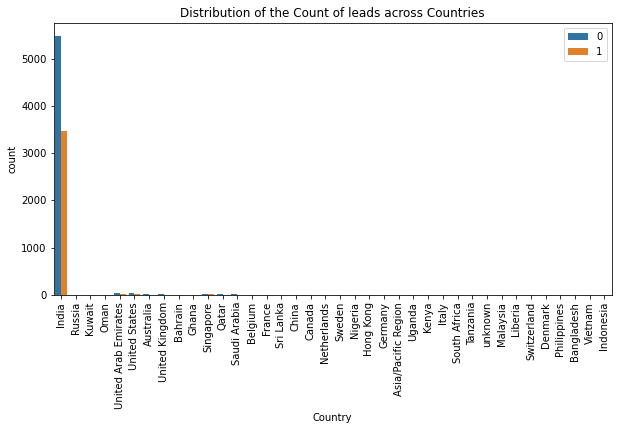

In [211]:
#Visualising the Country column again after imputing the Null values
 
#Setting the frame
plt.figure(figsize=(10,5))

#Visuale the Countplot
Count_fig=sns.countplot(leads.Country, hue=leads.Converted)
Count_fig.set_xticklabels(Count_fig.get_xticklabels(),rotation=90)

# Formatting the figure
plt.title("Distribution of the Count of leads across Countries")
plt.legend(loc=1)
plt.show()

##### Inference:
1. Since India is the most occuring country in the Dataset, it might not be suitable in terms of analysis as it may lead to classification issue. Hence the 'Country' variable can be dropped.

In [212]:
#Removing Country column from the dataset

leads.drop(['Country'],axis = 1,inplace = True)

In [213]:
#Checking one more time if Country is present in the Dataset

'Country' in leads.columns

False

In [214]:
#Rechecking the Dataset again

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Specialization                                 5860 

In [215]:
#checking the city column

leads.City.value_counts(dropna = False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [216]:
#checking the most frequest city

leads.City.mode()

0    Mumbai
dtype: object

In [217]:
#here we can notice that Mumbai is the most frequest city hence we can replace the null values

leads.City = leads.City.replace(np.nan,'Mumbai')

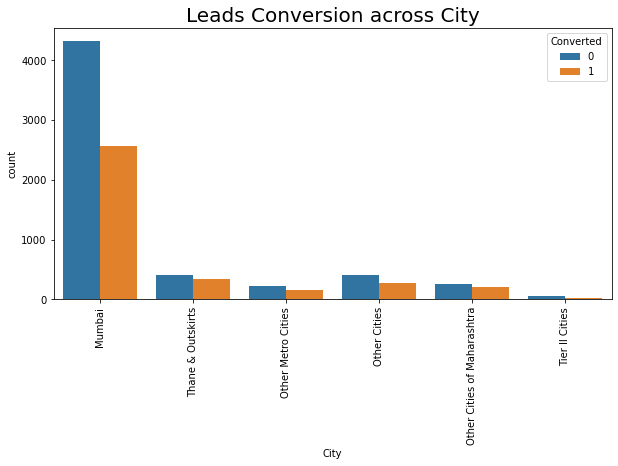

In [218]:
#Visualising the Country column again after imputing the Null values

plt.figure(figsize=(10,5))

#Visualising using Countplot
count_fig=sns.countplot(leads["City"], hue=leads['Converted'])
count_fig.set_xticklabels(count_fig.get_xticklabels(),rotation=90)

#Formatting the figure
plt.title("Leads Conversion across City",fontsize=20)
plt.show()

#### inference:
Here we can see that Mumbai is indeed the most frequent occuring city in the Dataset

In [219]:
#Rechecking the Data

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Specialization                                 5860 

In [220]:
#checking Specialization column

leads.Specialization.value_counts(dropna = False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [221]:
#checking the most frequest occuring Specialization

leads.Specialization.mode()

0    Finance Management
dtype: object

In [222]:
#Here we can see some of the Customer have not specified their specialization, we can mention them as 'Not Specified'

leads.Specialization = leads.Specialization.replace(np.nan,'Not Specified')

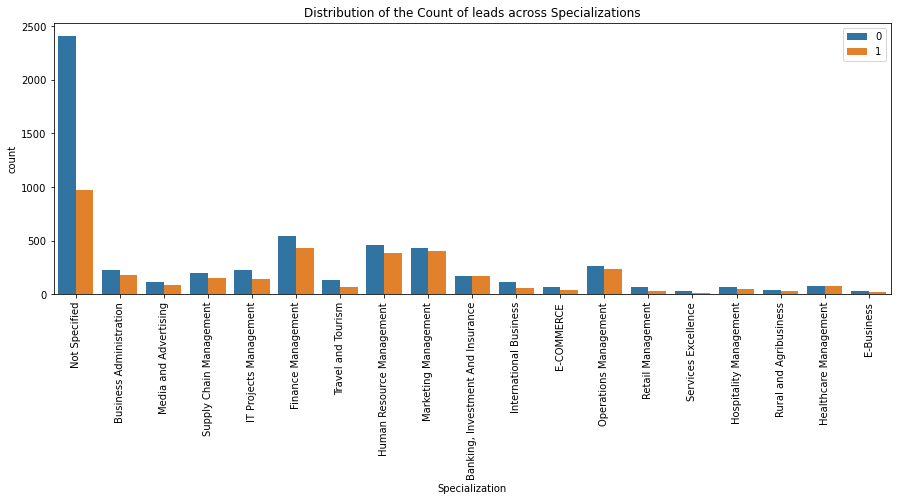

In [223]:
 
#Setting the frame
plt.figure(figsize=(15,5))

#Visuale the Countplot
Count_fig=sns.countplot(leads.Specialization, hue=leads.Converted)
Count_fig.set_xticklabels(Count_fig.get_xticklabels(),rotation=90)

# Formatting the figure
plt.title("Distribution of the Count of leads across Specializations")
plt.legend(loc=1)
plt.show()

#### Inference:
1. Management is having the highest number of leads converted. This is important and cannot be removed.

In [224]:
#Having the value count of 'Specialization' variable.
leads.Specialization.value_counts()

Not Specified                        3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [225]:
#Since Management is an import metric insde Specialisation, we can combine the entire Management under one category
# We can coin it as Management_Specialization
leads['Specialization'] = leads['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specialization')  

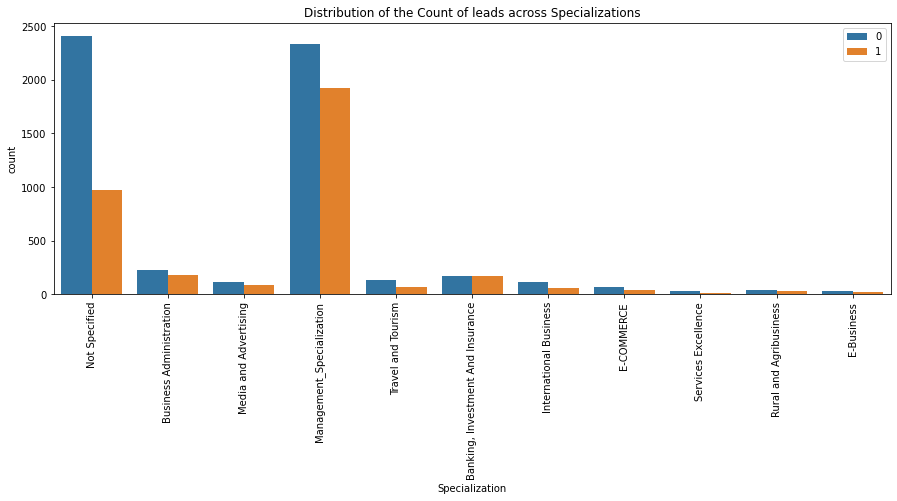

In [226]:
#Plotting the graph again after segmenting it into Management Specialization

#Setting the frame
plt.figure(figsize=(15,5))

#Visuale the Countplot
Count_fig=sns.countplot(leads.Specialization, hue=leads.Converted)
Count_fig.set_xticklabels(Count_fig.get_xticklabels(),rotation=90)

# Formatting the figure
plt.title("Distribution of the Count of leads across Specializations")
plt.legend(loc=1)
plt.show()

##### Inference:
1. Management has the highest number of leads ascompared to other specializations

In [227]:
#rechecking the data one more time

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Specialization                                 9240 

In [228]:
#checking the current occupation

leads['What is your current occupation'].value_counts(dropna = False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [229]:
#replacing all the null values with 'Unemployed'

leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan,'Unemployed')

In [230]:
#value count after imputing

leads['What is your current occupation'].value_counts(dropna = False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

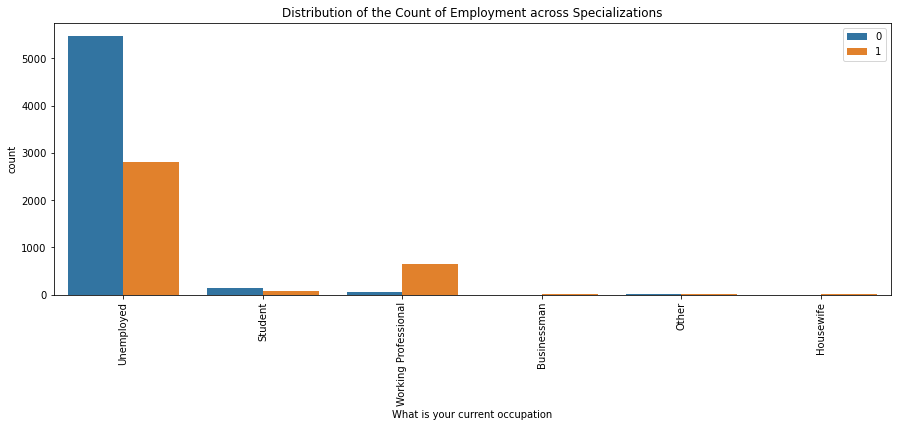

In [231]:
#Visualizing the Employment Variable


#Setting the frame
plt.figure(figsize=(15,5))

#Visuale the Countplot
Count_fig=sns.countplot(leads['What is your current occupation'], hue=leads.Converted)
Count_fig.set_xticklabels(Count_fig.get_xticklabels(),rotation=90)

# Formatting the figure
plt.title("Distribution of the Count of Employment across Specializations")
plt.legend(loc=1)
plt.show()

#### Inference:
1. Here Working Professional can go for the course as the chancesa arehigh
2. Unemployed leads are the highest over here.

In [232]:
#Ratio of Categories after imputation

leads['What is your current occupation'].value_counts(dropna=False,normalize = True,ascending=False)*100

Unemployed             89.72
Working Professional    7.64
Student                 2.27
Other                   0.17
Housewife               0.11
Businessman             0.09
Name: What is your current occupation, dtype: float64

In [233]:
#rechecking the data again

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Specialization                                 9240 

In [234]:
#checking 'What matters most to you in choosing a course' in the dataset

leads['What matters most to you in choosing a course'].value_counts(dropna = False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [235]:
leads['What matters most to you in choosing a course'] = leads['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

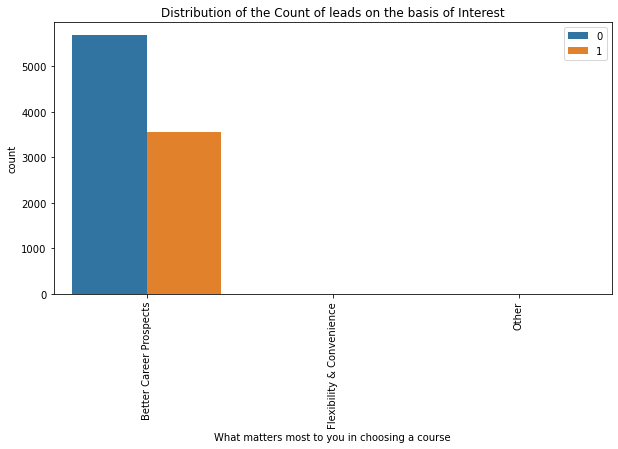

In [236]:
#Visualization of Distribution of the Count of leads on the basis of Interest

#Setting the frame
plt.figure(figsize=(10,5))

#Visuale the Countplot
Count_fig=sns.countplot(leads['What matters most to you in choosing a course'], hue=leads.Converted)
Count_fig.set_xticklabels(Count_fig.get_xticklabels(),rotation=90)

# Formatting the figure
plt.title("Distribution of the Count of leads on the basis of Interest")
plt.legend(loc=1)
plt.show()

##### Inference:
1. Better Career Prospects has higher number of leads and influences the column,hence we can remove this variable.

In [237]:
#Ratio of Categories after imputation

leads['What matters most to you in choosing a course'].value_counts(dropna=False,normalize = True,ascending=False)*100

Better Career Prospects     99.97
Flexibility & Convenience    0.02
Other                        0.01
Name: What matters most to you in choosing a course, dtype: float64

In [238]:
leads.drop(['What matters most to you in choosing a course'],axis = 1,inplace = True)

In [239]:
#Rechecking the data after removing the variable

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9240 non-null   object 
 1   Lead Source                               9204 non-null   object 
 2   Do Not Email                              9240 non-null   object 
 3   Do Not Call                               9240 non-null   object 
 4   Converted                                 9240 non-null   int64  
 5   TotalVisits                               9103 non-null   float64
 6   Total Time Spent on Website               9240 non-null   int64  
 7   Page Views Per Visit                      9103 non-null   float64
 8   Last Activity                             9137 non-null   object 
 9   Specialization                            9240 non-null   object 
 10  What is your current occupation     

In [240]:
#checking the value count of the variable 'Tags'

leads['Tags'].value_counts(dropna = False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [241]:
#Changing Nan values in Tag with "Not Specified"
leads['Tags'] = leads['Tags'].replace(np.nan,'Not Specified')

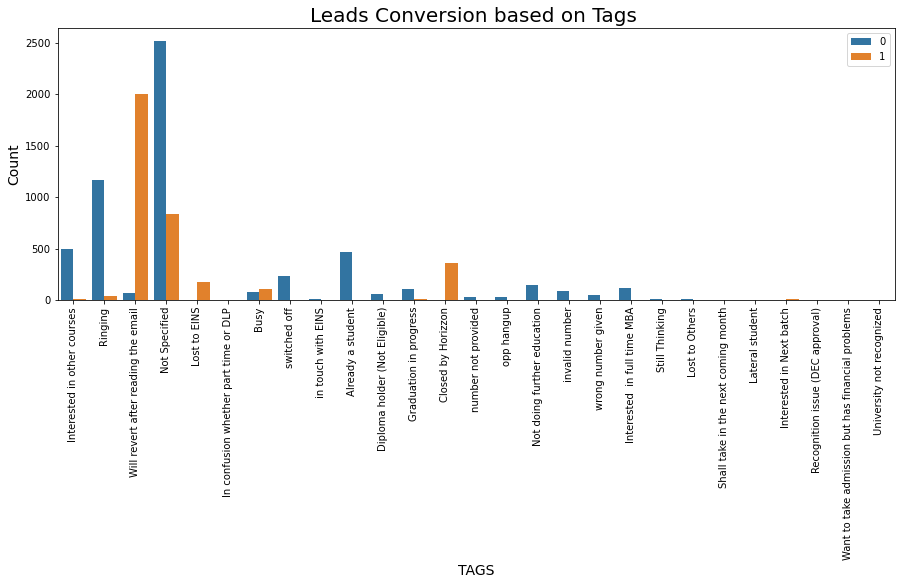

In [242]:
#Countplot on Tag variable

#Setting the frame
plt.figure(figsize=(15,5))

#Visualising using Countplot

count_fig=sns.countplot(leads['Tags'], hue=leads['Converted'])
count_fig.set_xticklabels(count_fig.get_xticklabels(),rotation=90)

#Formatting the plot
plt.title("Leads Conversion based on Tags ",fontsize=20)
plt.xlabel("TAGS", fontsize=14)
plt.legend(loc=1)
plt.ylabel("Count", fontsize=14)
plt.show()

In [243]:
#Since some tags have very minimal values, we can replace them as "Other Tags"
leads['Tags'] = leads['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized','switched off','Already a student','Not doing further education',
                                     'invalid number','wrong number given','Interested  in full time MBA'], 'Other_Tags')

In [244]:
#checking the value count of the 'Lead Source' column

leads['Lead Source'].value_counts(dropna = False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
NC_EDM                  1
testone                 1
welearnblog_Home        1
youtubechannel          1
Pay per Click Ads       1
blog                    1
WeLearn                 1
Name: Lead Source, dtype: int64

In [245]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9240 non-null   object 
 1   Lead Source                               9204 non-null   object 
 2   Do Not Email                              9240 non-null   object 
 3   Do Not Call                               9240 non-null   object 
 4   Converted                                 9240 non-null   int64  
 5   TotalVisits                               9103 non-null   float64
 6   Total Time Spent on Website               9240 non-null   int64  
 7   Page Views Per Visit                      9103 non-null   float64
 8   Last Activity                             9137 non-null   object 
 9   Specialization                            9240 non-null   object 
 10  What is your current occupation     

In [246]:
leads.isnull().sum()

Lead Origin                                   0
Lead Source                                  36
Do Not Email                                  0
Do Not Call                                   0
Converted                                     0
TotalVisits                                 137
Total Time Spent on Website                   0
Page Views Per Visit                        137
Last Activity                               103
Specialization                                0
What is your current occupation               0
Search                                        0
Magazine                                      0
Newspaper Article                             0
X Education Forums                            0
Newspaper                                     0
Digital Advertisement                         0
Through Recommendations                       0
Receive More Updates About Our Courses        0
Tags                                          0
Update me on Supply Chain Content       

In [247]:
leads['Lead Source'].value_counts(dropna = False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
NC_EDM                  1
testone                 1
welearnblog_Home        1
youtubechannel          1
Pay per Click Ads       1
blog                    1
WeLearn                 1
Name: Lead Source, dtype: int64

In [248]:
#Some lead sources are containing Null values we can coin it as 'Others'

leads['Lead Source'] = leads['Lead Source'].replace(np.nan,'Others')

In [249]:
#Also we can combining low frequency values present in the Lead Source

leads['Lead Source'] = leads['Lead Source'].replace('google','Google')
leads['Lead Source'] = leads['Lead Source'].replace('Facebook','Social Media')
leads['Lead Source'] = leads['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others')   

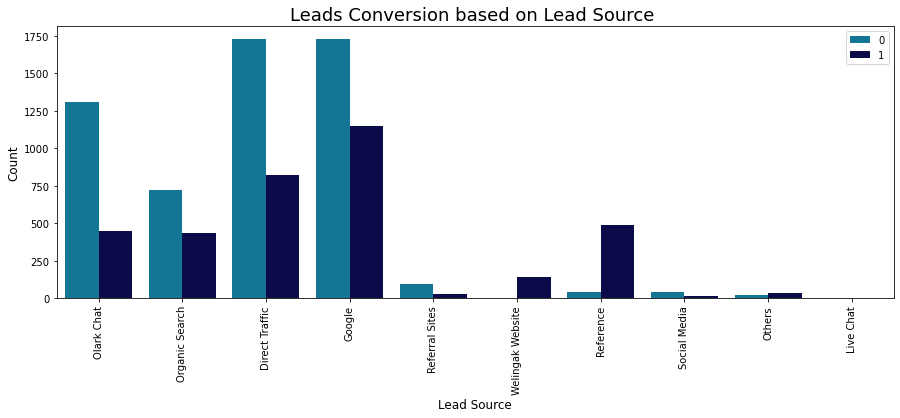

In [250]:
#Setting the frame
plt.figure(figsize=(15,5))

#Visualising using Countplot

count_fig=sns.countplot(leads['Lead Source'], hue=leads['Converted'],palette='ocean_r')
count_fig.set_xticklabels(count_fig.get_xticklabels(),rotation=90)

#Formatting the plot
plt.title("Leads Conversion based on Lead Source ",fontsize=18)
plt.xlabel("Lead Source", fontsize=12)
plt.legend(loc=1)
plt.ylabel("Count", fontsize=12)
plt.show()  

#### Inference:
1. Highest number of the leads are generated from Google and Direct Traffic.
2. While the least being the Live chat attribute through which leads can be generated
3. leads can be maximized from References and other Welingak Website

In [251]:
#checking Activity Varaible

leads['Last Activity'].value_counts(dropna = False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [252]:
# Checking on the ratio of categories

leads['Last Activity'].value_counts(dropna=False, normalize = True)*100

Email Opened                   37.20
SMS Sent                       29.71
Olark Chat Conversation        10.53
Page Visited on Website         6.93
Converted to Lead               4.63
Email Bounced                   3.53
Email Link Clicked              2.89
Form Submitted on Website       1.26
NaN                             1.11
Unreachable                     1.01
Unsubscribed                    0.66
Had a Phone Conversation        0.32
Approached upfront              0.10
View in browser link Clicked    0.06
Email Marked Spam               0.02
Email Received                  0.02
Resubscribed to emails          0.01
Visited Booth in Tradeshow      0.01
Name: Last Activity, dtype: float64

In [253]:
# Converting Null values to "others"
leads['Last Activity'] = leads['Last Activity'].replace(np.nan,'Others')

In [254]:
leads['Last Activity'] = leads['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [255]:
# Checking the values of the Last Activity Variable

leads['Last Activity'].value_counts()

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [256]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9240 non-null   object 
 1   Lead Source                               9240 non-null   object 
 2   Do Not Email                              9240 non-null   object 
 3   Do Not Call                               9240 non-null   object 
 4   Converted                                 9240 non-null   int64  
 5   TotalVisits                               9103 non-null   float64
 6   Total Time Spent on Website               9240 non-null   int64  
 7   Page Views Per Visit                      9103 non-null   float64
 8   Last Activity                             9240 non-null   object 
 9   Specialization                            9240 non-null   object 
 10  What is your current occupation     

In [257]:
#Noe we will be checking again for Null Values
nratio = (leads.isnull().sum()/len(leads))*100
nratio

Lead Origin                                0.00
Lead Source                                0.00
Do Not Email                               0.00
Do Not Call                                0.00
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              0.00
Specialization                             0.00
What is your current occupation            0.00
Search                                     0.00
Magazine                                   0.00
Newspaper Article                          0.00
X Education Forums                         0.00
Newspaper                                  0.00
Digital Advertisement                      0.00
Through Recommendations                    0.00
Receive More Updates About Our Courses     0.00
Tags                                       0.00
Update me on Supply Chain Content       

#### inference:
1. Since we have less than 2% of NA values so we can remove them

In [258]:
leads = leads.dropna()

In [259]:
#Noe we will be checking again for Null Values
nratio = (leads.isnull().sum()/len(leads))*100
nratio

Lead Origin                                0.00
Lead Source                                0.00
Do Not Email                               0.00
Do Not Call                                0.00
Converted                                  0.00
TotalVisits                                0.00
Total Time Spent on Website                0.00
Page Views Per Visit                       0.00
Last Activity                              0.00
Specialization                             0.00
What is your current occupation            0.00
Search                                     0.00
Magazine                                   0.00
Newspaper Article                          0.00
X Education Forums                         0.00
Newspaper                                  0.00
Digital Advertisement                      0.00
Through Recommendations                    0.00
Receive More Updates About Our Courses     0.00
Tags                                       0.00
Update me on Supply Chain Content       

In [260]:
#checking the lead origin variable

leads['Lead Origin'].value_counts(dropna = False)

Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead Origin, dtype: int64

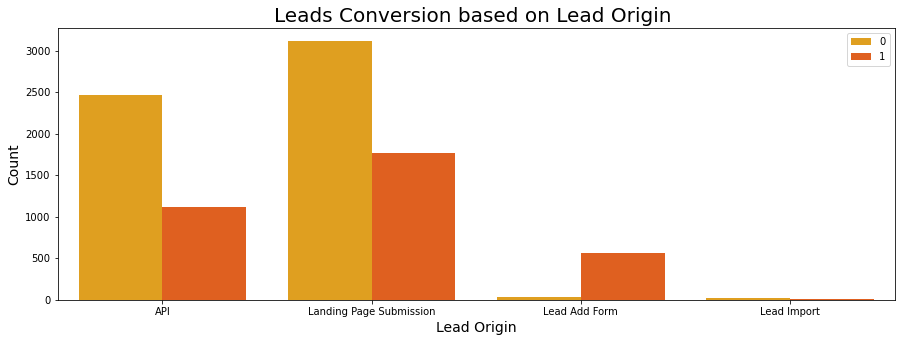

In [261]:
#visualizing count of Variable based on Converted value

#Setting the frame
plt.figure(figsize=(15,5))

#Visualising using Countplot

count_fig=sns.countplot(leads['Lead Origin'], hue=leads['Converted'],palette='autumn_r')
count_fig.set_xticklabels(count_fig.get_xticklabels(),rotation=0)

#Formatting the plot
plt.title("Leads Conversion based on Lead Origin ",fontsize=20)
plt.xlabel("Lead Origin", fontsize=14)
plt.legend(loc=1)
plt.ylabel("Count", fontsize=14)
plt.show()


##### Inferences:
    
1. API and Landing page is giving away the most leads for conversion.
2. Lead Add form has high number leads for conversion but the count of the leads is less.
3. Higher count of leads in Lead Add form can lead to higher conversion

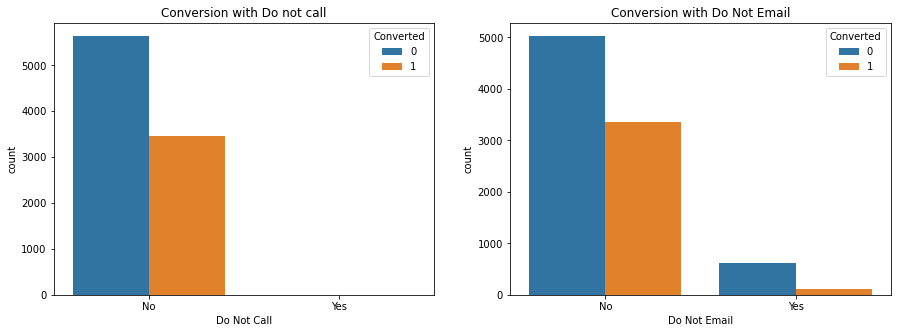

In [262]:
# Checking the variables Do Not Email & Do Not Call using a Subplots

plt.figure(figsize=(15,5))

ax1=plt.subplot(1, 2, 1)
ax1=sns.countplot(leads['Do Not Call'], hue=leads['Converted'])
plt.title("Conversion with Do not call")

ax2=plt.subplot(1, 2, 2, sharex=ax1)
ax2=sns.countplot(leads['Do Not Email'], hue=leads['Converted'])
plt.title("Conversion with Do Not Email")
plt.show()

##### Inference:
1. Here we can see 'Do not Call' and 'Do not Email' has higher number of conversion as compared to said being 'Yes'

In [263]:
#Checking value count for Do Not Call variable

leads['Do Not Call'].value_counts(dropna = False)

No     9101
Yes       2
Name: Do Not Call, dtype: int64

In [264]:
leads.drop("Do Not Call", axis = 1, inplace=True)

In [265]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9103 non-null   object 
 1   Lead Source                               9103 non-null   object 
 2   Do Not Email                              9103 non-null   object 
 3   Converted                                 9103 non-null   int64  
 4   TotalVisits                               9103 non-null   float64
 5   Total Time Spent on Website               9103 non-null   int64  
 6   Page Views Per Visit                      9103 non-null   float64
 7   Last Activity                             9103 non-null   object 
 8   Specialization                            9103 non-null   object 
 9   What is your current occupation           9103 non-null   object 
 10  Search                              

In [266]:
#checking value counts of 'Do Not Email'

leads['Do Not Email'].value_counts(dropna = False)

No     8379
Yes     724
Name: Do Not Email, dtype: int64

In [267]:
#ratio of 'Do Not Email'

leads['Do Not Email'].value_counts(normalize = True)*100

No    92.05
Yes    7.95
Name: Do Not Email, dtype: float64

### Checking of Categorical Columns if any should be dropped

In [268]:
cat_var_check = (['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque'])

In [269]:
for i in cat_var_check:
    print(i)
    print(leads[i].value_counts(dropna = False))
    print("---------------------------------")

Search
No     9089
Yes      14
Name: Search, dtype: int64
---------------------------------
Magazine
No    9103
Name: Magazine, dtype: int64
---------------------------------
Newspaper Article
No     9101
Yes       2
Name: Newspaper Article, dtype: int64
---------------------------------
X Education Forums
No     9102
Yes       1
Name: X Education Forums, dtype: int64
---------------------------------
Newspaper
No     9102
Yes       1
Name: Newspaper, dtype: int64
---------------------------------
Digital Advertisement
No     9099
Yes       4
Name: Digital Advertisement, dtype: int64
---------------------------------
Through Recommendations
No     9096
Yes       7
Name: Through Recommendations, dtype: int64
---------------------------------
Receive More Updates About Our Courses
No    9103
Name: Receive More Updates About Our Courses, dtype: int64
---------------------------------
Update me on Supply Chain Content
No    9103
Name: Update me on Supply Chain Content, dtype: int64
-------

In [270]:
leads.drop(cat_var_check,axis=1,inplace = True)

In [271]:
leads['Last Notable Activity'].value_counts()

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
View in browser link Clicked       1
Form Submitted on Website          1
Resubscribed to emails             1
Approached upfront                 1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [272]:
#We can consolidate the categories that has less than 1% occurance on the Last Notable Activity

leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['Had a Phone Conversation','Email Marked Spam',
                                                                       'Unreachable','Unsubscribed','Email Bounced',
                                                                       'Resubscribed to emails','View in browser link Clicked',
                                                                       'Approached upfront', 'Form Submitted on WebWebsite',
                                                                       'Email Received'],'Other_Notable_activity')

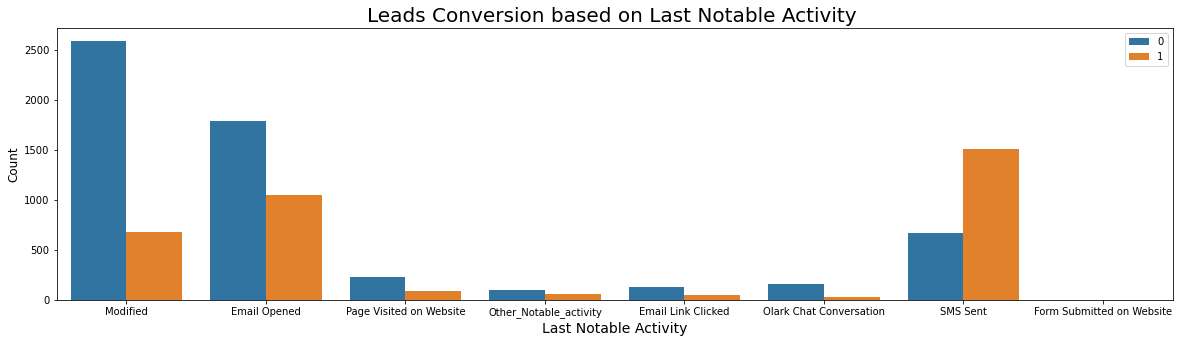

In [273]:
#Setting the frame
plt.figure(figsize=(20,5))

#Visualising using Countplot

count_fig=sns.countplot(leads['Last Notable Activity'], hue=leads['Converted'])
count_fig.set_xticklabels(count_fig.get_xticklabels(),rotation=0)

#Formatting the plot
plt.title("Leads Conversion based on Last Notable Activity ",fontsize=20)
plt.xlabel("Last Notable Activity", fontsize=14)
plt.legend(loc=1)
plt.ylabel("Count", fontsize=12)
plt.show()

##### Inference:
1. SMS Sent and Email opened is having higher number of leads as compared to others.
2. Modified has the least number of leads conversion ration

In [274]:
#count of categories under 'Last Notable Activity'

leads['Last Notable Activity'].value_counts()

Modified                     3270
Email Opened                 2827
SMS Sent                     2172
Page Visited on Website       318
Olark Chat Conversation       183
Email Link Clicked            173
Other_Notable_activity        159
Form Submitted on Website       1
Name: Last Notable Activity, dtype: int64

In [275]:
#checking the ratio of 'Last Notable Activity'
leads['Last Notable Activity'].value_counts(normalize = True)*100

Modified                    35.92
Email Opened                31.06
SMS Sent                    23.86
Page Visited on Website      3.49
Olark Chat Conversation      2.01
Email Link Clicked           1.90
Other_Notable_activity       1.75
Form Submitted on Website    0.01
Name: Last Notable Activity, dtype: float64

In [276]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Specialization                          9103 non-null   object 
 9   What is your current occupation         9103 non-null   object 
 10  Tags                                    9103 non-null   obje

In [277]:
#Now Analyzing Numerical Variables

leads['Converted'].value_counts()

0    5642
1    3461
Name: Converted, dtype: int64

In [278]:
leads['Converted'].value_counts(normalize = True)*100

0   61.98
1   38.02
Name: Converted, dtype: float64

##### Here we can notice that the conversion ratio is 38%.

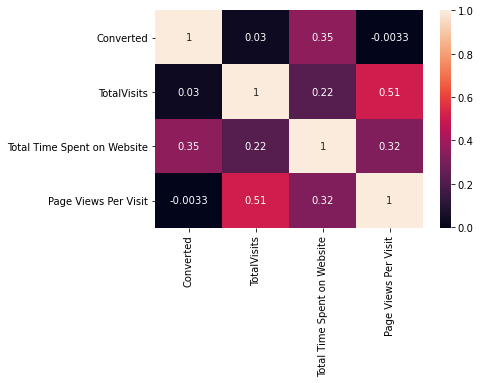

In [279]:
#Analyzing the numerical variables on Correlation using heat Map

sns.heatmap(leads.corr(),annot = True)
plt.show()

In [280]:
#Analyzing the' Total Time Spent on Website'

leads['Total Time Spent on Website'].describe()

count   9103.00
mean     481.35
std      545.07
min        0.00
25%        9.00
50%      244.00
75%      919.50
max     2272.00
Name: Total Time Spent on Website, dtype: float64

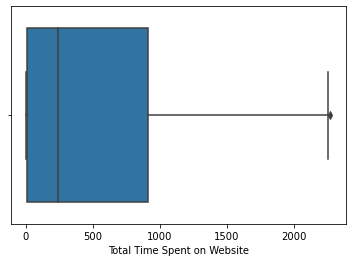

The median of 'Total Time Spent on Website' 240.0


In [394]:
#using box plots for outlier detection

sns.boxplot(leads['Total Time Spent on Website'])
plt.show()

print("The median of 'Total Time Spent on Website'",leads['Total Time Spent on Website'].median())

In [282]:
#Analyzing the TotalVisits

leads['TotalVisits'].describe()

count   9103.00
mean       3.45
std        4.85
min        0.00
25%        1.00
50%        3.00
75%        5.00
max      251.00
Name: TotalVisits, dtype: float64

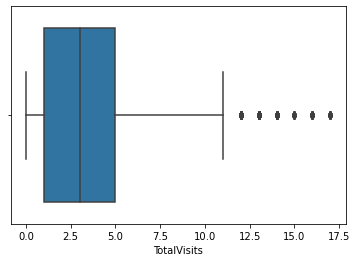

The median of 'TotalVisits' 3.0


In [395]:
#Using boxplot to showcase if any outlier is present in the dataset or not

sns.boxplot(leads['TotalVisits'])
plt.show()

print("The median of 'TotalVisits'",leads['TotalVisits'].median())

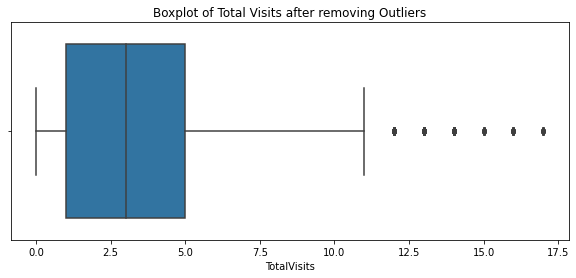

In [284]:
#From the above boxplot we can see that there are outliers present in the variable

#Removing the Oultiers from the data
plt.figure(figsize=(10,4))

Q3 = leads['TotalVisits'].quantile(0.99)

leads = leads[(leads['TotalVisits'] <= Q3)]

Q1 = leads['TotalVisits'].quantile(0.01)

leads = leads[(leads['TotalVisits'] >= Q1)]

sns.boxplot(x=leads['TotalVisits'])
plt.title("Boxplot of Total Visits after removing Outliers")
plt.show()

In [285]:
leads.shape

(9020, 14)

In [286]:
#Analyzing Page Views per visit

leads['Page Views Per Visit'].describe()

count   9020.00
mean       2.34
std        2.06
min        0.00
25%        1.00
50%        2.00
75%        3.00
max       16.00
Name: Page Views Per Visit, dtype: float64

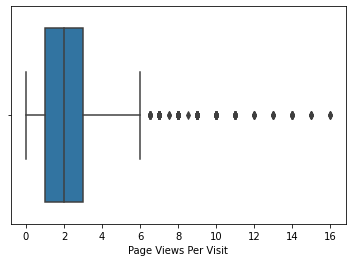

The median 2.0


In [287]:
#Boxplot to see if there are any outliers to be treated

sns.boxplot(x = leads['Page Views Per Visit'])
plt.show()
print("The median",leads['Page Views Per Visit'].median())

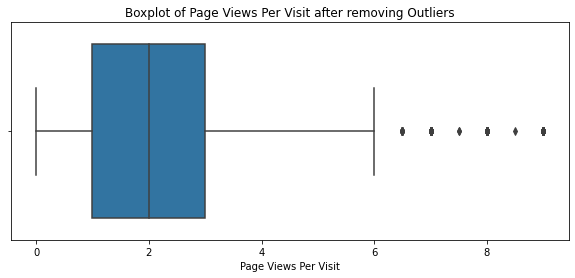

In [288]:


plt.figure(figsize=(10,4))

Q3 = leads['Page Views Per Visit'].quantile(0.99)

leads = leads[(leads['Page Views Per Visit'] <= Q3)]

Q1 = leads['Page Views Per Visit'].quantile(0.01)

leads = leads[(leads['Page Views Per Visit'] >= Q1)]

sns.boxplot(x=leads['Page Views Per Visit'])
plt.title("Boxplot of Page Views Per Visit after removing Outliers")
plt.show()


In [289]:
#checking the shape of the dataset again

leads.shape

(8953, 14)

In [290]:
#checking the null values in the dataset

leads.isnull().sum()

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
Tags                                      0
City                                      0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

##### Inference:
Here we can see that are no NA values present in the dataset

## Model Preparation

### Step 1 : Creating Dummy Variables

In [291]:
#First we need to segregate the Categorical Variables present in the Dataset


cat_vals= leads.select_dtypes(include=['object']).columns
cat_vals

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [292]:
#printing the variables to see if mapping is neeeded

for i in cat_vals:
    print(i)
    print(leads[i].value_counts())
    print(" ")


Lead Origin
Landing Page Submission    4769
API                        3546
Lead Add Form               607
Lead Import                  31
Name: Lead Origin, dtype: int64
 
Lead Source
Google              2841
Direct Traffic      2499
Olark Chat          1751
Organic Search      1092
Reference            442
Welingak Website     129
Referral Sites       117
Others                47
Social Media          33
Live Chat              2
Name: Lead Source, dtype: int64
 
Do Not Email
No     8256
Yes     697
Name: Do Not Email, dtype: int64
 
Last Activity
Email Opened                 3390
SMS Sent                     2700
Olark Chat Conversation       966
Page Visited on Website       594
Converted to Lead             428
Email Bounced                 310
Email Link Clicked            264
Others                        187
Form Submitted on Website     114
Name: Last Activity, dtype: int64
 
Specialization
Management_Specialization            4126
Not Specified                        3284
Bus

In [293]:
# We can notice that 'A free copy of Mastering The Interview','Do Not Email' has yes and no's which can be changed to 0's and 1's

map_vars =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the variable list
leads[map_vars] = leads[map_vars].apply(binary_map)


In [294]:
#checking if mapping has been done

leads[map_vars].head()

,A free copy of Mastering The Interview,Do Not Email
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


##### Now we will add Dummy Variables to the dataset for 'Lead Origin','What is your current occupation' and 'City'

In [295]:
#getting dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(leads[['Lead Origin','What is your current occupation',
                             'City']], drop_first=True)

leads = pd.concat([leads,dummy],1)


In [296]:
#Adding Dummy Variables to the dataset for Specialization


dummy = pd.get_dummies(leads['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Not Specified'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [297]:
#Adding dummy variable to the Data set for Lead Source

dummy = pd.get_dummies(leads['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [298]:
#Adding dummy variable to the Data set for Last Activity

dummy = pd.get_dummies(leads['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Others'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [299]:
#Adding dummy variable to the Data set for Last Notable Activity

dummy = pd.get_dummies(leads['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Other_Notable_activity'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [300]:
#Adding dummy variable to the Data set for Tags

dummy = pd.get_dummies(leads['Tags'], prefix  = 'Tags')
dummy = dummy.drop(['Tags_Not Specified'], 1)
leads = pd.concat([leads, dummy], axis = 1)

### Since dummy variables has been created for all the Categorical Variables, now we can remove all the original attributes from the dataset

In [301]:
#Since we have created dummy variables for all the categorical variables we can now remove the Original variables from the set

leads.drop(cat_vals,axis = 1,inplace = True)

In [302]:
leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specialization,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
0,0,0.00,0,0.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,0,5.00,674,2.50,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,1,2.00,1532,2.00,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,0,1.00,305,1.00,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,1,2.00,1428,1.00,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [303]:
#checking the dataset info

leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8953 entries, 0 to 9239
Data columns (total 58 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             8953 non-null   int64  
 1   TotalVisits                                           8953 non-null   float64
 2   Total Time Spent on Website                           8953 non-null   int64  
 3   Page Views Per Visit                                  8953 non-null   float64
 4   Lead Origin_Landing Page Submission                   8953 non-null   uint8  
 5   Lead Origin_Lead Add Form                             8953 non-null   uint8  
 6   Lead Origin_Lead Import                               8953 non-null   uint8  
 7   What is your current occupation_Housewife             8953 non-null   uint8  
 8   What is your current occupation_Other                 8953

In [304]:
#Since there are no variables present now we can go ahead and create the model

y = leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [305]:
#Dropping the Independent variables.

X = leads.drop('Converted',axis =1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specialization,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
0,0.00,0,0.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,5.00,674,2.50,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,2.00,1532,2.00,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,1.00,305,1.00,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,2.00,1428,1.00,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [306]:
# Splitting into train and test data at 70: 30 Ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)


In [307]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specialization,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
9196,5.00,1490,5.00,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4696,3.00,457,3.00,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3274,4.00,126,2.00,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2164,2.00,393,2.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1667,4.00,1167,1.33,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [308]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specialization,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
7681,5.00,311,2.50,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
984,3.00,183,3.00,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
8135,2.00,913,2.00,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6915,4.00,141,2.00,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2712,3.00,252,3.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [309]:
y_train.head()

9196    1
4696    0
3274    0
2164    0
1667    1
Name: Converted, dtype: int64

In [310]:
y_test.head()

7681    0
984     0
8135    0
6915    0
2712    1
Name: Converted, dtype: int64

In [311]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6267 entries, 9196 to 5825
Data columns (total 57 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           6267 non-null   float64
 1   Total Time Spent on Website                           6267 non-null   int64  
 2   Page Views Per Visit                                  6267 non-null   float64
 3   Lead Origin_Landing Page Submission                   6267 non-null   uint8  
 4   Lead Origin_Lead Add Form                             6267 non-null   uint8  
 5   Lead Origin_Lead Import                               6267 non-null   uint8  
 6   What is your current occupation_Housewife             6267 non-null   uint8  
 7   What is your current occupation_Other                 6267 non-null   uint8  
 8   What is your current occupation_Student               6

In [312]:
X_train.shape

(6267, 57)

In [313]:
y_train.shape

(6267,)

In [314]:
X_test.shape

(2686, 57)

In [315]:
y_test.shape

(2686,)

### Scaling the Data now with - Standard Scaler

In [316]:
scaler = StandardScaler()

# Selecting numerical cols for scaling 

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specialization,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
9196,0.67,1.85,1.46,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4696,-0.03,-0.04,0.40,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3274,0.32,-0.64,-0.13,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2164,-0.38,-0.15,-0.13,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1667,0.32,1.26,-0.48,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [317]:
#building Logistic Regression using Statsmodel and RFE


#Creating an instance of Logistic Regression
log_reg = LogisticRegression()

 # running RFE with 15 variables 
rfe = RFE(log_reg, 15)    
rfe = rfe.fit(X_train, y_train)

In [318]:
rfe.support_

array([False,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False,  True,  True, False,  True, False,  True,  True,  True,
        True,  True,  True])

In [319]:
#Combining the data to understand the full Data (RFE)

zip_data = zip(X_train.columns, rfe.support_, rfe.ranking_)
zip_data = list(zip_data)
zip_data

[('TotalVisits', False, 26),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 24),
 ('Lead Origin_Landing Page Submission', False, 10),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 16),
 ('What is your current occupation_Housewife', False, 31),
 ('What is your current occupation_Other', False, 35),
 ('What is your current occupation_Student', False, 23),
 ('What is your current occupation_Unemployed', False, 20),
 ('What is your current occupation_Working Professional', False, 8),
 ('City_Other Cities', False, 22),
 ('City_Other Cities of Maharashtra', False, 38),
 ('City_Other Metro Cities', False, 41),
 ('City_Thane & Outskirts', False, 39),
 ('City_Tier II Cities', False, 28),
 ('Specialization_Banking, Investment And Insurance', False, 14),
 ('Specialization_Business Administration', False, 40),
 ('Specialization_E-Business', False, 36),
 ('Specialization_E-COMMERCE', False, 21),
 ('Specialization_International Business', F

In [320]:
#checking the rfe supported columns

rfe_support_col = X_train.columns[rfe.support_]
rfe_support_col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email'],
      dtype='object')

In [321]:
#Showcase the columns which are not support by RFE

X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'City_Tier II Cities',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management_Specialization',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Lead Source

## We can now start building Model for further Analysis of the Dataset

In [322]:
#Building Model 1

X_train_sm = sm.add_constant(X_train[rfe_support_col])
log_m1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_m1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1254.7
Date:                Mon, 06 Dec 2021   Deviance:                       2509.3
Time:                        20:30:09   Pearson chi2:                 8.34e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.1899      0.088    -13.480      0.000      -1.363      -1.017
Total Time Spent on Website                       0.8970      0.053     16.999      0.000       0.794       1.000
Lead Origin_Lead Add Form                         1.6712      0.450      3.714      0.000       0.789       2.553
Lead Source_Direct Traffic                       -0.8320      0.129     -6.471      0.000      -1.084      -0.580
Lead Source_Referral Sites                       -0.5284      0.465     -1.138      0.255      -1.439       0.382
Lead Source_Welingak Website                      3.9043      1.110      3.518      0.000       1.729       6.079
Last Activity_SMS Sent                            1.2373      0.223      5.555      0.000       0.801       1.674
Last Notable Activity_Modified                   -1.2839      0.150     -8.532      0.000      -1.579      -0.989
Last Notable Activity_Olark Chat Conversation    -1.7123      0.490     -3.496      0.000      -2.672      -0.752
Last Notable Activity_SMS Sent                    1.0151      0.257      3.943      0.000       0.511       1.520
Tags_Closed by Horizzon                           6.9834      1.019      6.853      0.000       4.986       8.981
Tags_Interested in other courses                 -2.1641      0.407     -5.321      0.000      -2.961      -1.367
Tags_Lost to EINS                                 5.7302      0.608      9.419      0.000       4.538       6.923
Tags_Other_Tags                                  -2.4417      0.210    -11.633      0.000      -2.853      -2.030
Tags_Ringing                                     -3.5858      0.243    -14.752      0.000      -4.062      -3.109
Tags_Will revert after reading the email          4.4263      0.185     23.989      0.000       4.065       4.788
=================================================================================================================
"""

#### Inference:
    
1. When we will be evaluating RFE, we need to remove the variable with the highest p value.
2. Hence we need to remove 'Lead Source_Referral Sites' which needs to be dropped for further analysis.

In [323]:

#now we will be dropping the column with high p-value

rfe_support_col = rfe_support_col.drop('Lead Source_Referral Sites')

In [324]:
#Model 2 after removing the Lead Source Referral Sites

X_train_sm = sm.add_constant(X_train[rfe_support_col])
log_m2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_m2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1255.3
Date:                Mon, 06 Dec 2021   Deviance:                       2510.7
Time:                        20:30:09   Pearson chi2:                 8.34e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.2029      0.088    -13.729      0.000      -1.375      -1.031
Total Time Spent on Website                       0.8963      0.053     16.979      0.000       0.793       1.000
Lead Origin_Lead Add Form                         1.6795      0.450      3.735      0.000       0.798       2.561
Lead Source_Direct Traffic                       -0.8224      0.128     -6.409      0.000      -1.074      -0.571
Lead Source_Welingak Website                      3.9060      1.110      3.520      0.000       1.731       6.081
Last Activity_SMS Sent                            1.2437      0.223      5.584      0.000       0.807       1.680
Last Notable Activity_Modified                   -1.2791      0.150     -8.501      0.000      -1.574      -0.984
Last Notable Activity_Olark Chat Conversation    -1.7079      0.489     -3.491      0.000      -2.667      -0.749
Last Notable Activity_SMS Sent                    1.0150      0.257      3.943      0.000       0.510       1.520
Tags_Closed by Horizzon                           6.9868      1.019      6.857      0.000       4.990       8.984
Tags_Interested in other courses                 -2.2028      0.409     -5.391      0.000      -3.004      -1.402
Tags_Lost to EINS                                 5.7337      0.608      9.426      0.000       4.541       6.926
Tags_Other_Tags                                  -2.4401      0.210    -11.625      0.000      -2.852      -2.029
Tags_Ringing                                     -3.5818      0.243    -14.740      0.000      -4.058      -3.106
Tags_Will revert after reading the email          4.4234      0.184     23.993      0.000       4.062       4.785
=================================================================================================================
"""

 Now we can see that every variable has p values = 0. Hence we can go ahead and check for Variance Inflation Factor for any sort of correlation between the attributes.

#### Using Variance Inflation Factor to see any correlation between Variables

In [325]:
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_support_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_support_col].values, i) for i in range(X_train[rfe_support_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Last Notable Activity_SMS Sent,6.22
4,Last Activity_SMS Sent,6.12
1,Lead Origin_Lead Add Form,1.82
5,Last Notable Activity_Modified,1.69
13,Tags_Will revert after reading the email,1.61
2,Lead Source_Direct Traffic,1.38
3,Lead Source_Welingak Website,1.34
11,Tags_Other_Tags,1.26
0,Total Time Spent on Website,1.22
8,Tags_Closed by Horizzon,1.21


##### Here we can noticed that 'Last Notable Activity_SMS Sent	6.22' has the highest VIF value which is above 5 and it needs to be removed.

In [326]:
#Removing variable with high VIF Value

rfe_support_col = rfe_support_col.drop('Last Notable Activity_SMS Sent',1)

In [327]:
# Logistic Model 3
X_train_sm = sm.add_constant(X_train[rfe_support_col])
log_m3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_m3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6253
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1263.3
Date:                Mon, 06 Dec 2021   Deviance:                       2526.6
Time:                        20:30:10   Pearson chi2:                 8.51e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.1179      0.084    -13.382      0.000      -1.282      -0.954
Total Time Spent on Website                       0.8896      0.053     16.907      0.000       0.786       0.993
Lead Origin_Lead Add Form                         1.6630      0.455      3.657      0.000       0.772       2.554
Lead Source_Direct Traffic                       -0.8212      0.127     -6.471      0.000      -1.070      -0.572
Lead Source_Welingak Website                      3.8845      1.114      3.488      0.000       1.701       6.068
Last Activity_SMS Sent                            1.9981      0.113     17.718      0.000       1.777       2.219
Last Notable Activity_Modified                   -1.6525      0.124    -13.279      0.000      -1.896      -1.409
Last Notable Activity_Olark Chat Conversation    -1.8023      0.491     -3.669      0.000      -2.765      -0.839
Tags_Closed by Horizzon                           7.1955      1.020      7.053      0.000       5.196       9.195
Tags_Interested in other courses                 -2.1318      0.406     -5.253      0.000      -2.927      -1.336
Tags_Lost to EINS                                 5.9177      0.611      9.689      0.000       4.721       7.115
Tags_Other_Tags                                  -2.3737      0.206    -11.507      0.000      -2.778      -1.969
Tags_Ringing                                     -3.4531      0.238    -14.532      0.000      -3.919      -2.987
Tags_Will revert after reading the email          4.5070      0.188     24.002      0.000       4.139       4.875
=================================================================================================================
"""

In [328]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_support_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_support_col].values, i) for i in range(X_train[rfe_support_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,1.82
12,Tags_Will revert after reading the email,1.56
4,Last Activity_SMS Sent,1.46
5,Last Notable Activity_Modified,1.40
2,Lead Source_Direct Traffic,1.38
3,Lead Source_Welingak Website,1.34
10,Tags_Other_Tags,1.25
0,Total Time Spent on Website,1.22
7,Tags_Closed by Horizzon,1.21
11,Tags_Ringing,1.16


#### Inference:
Now here all the values are below 5. Now we can go ahead with the prediction on the train dataset

In [329]:
# now we will Predict the 10 values present in the  train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

9196   0.28
4696   0.03
3274   0.58
2164   0.01
1667   0.99
7024   0.13
8018   0.02
778    0.21
6942   0.00
4440   0.10
dtype: float64

In [330]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.28314859, 0.0314396 , 0.57663553, 0.00643284, 0.98910464,
       0.13081306, 0.02421913, 0.20559401, 0.00267787, 0.09671623])

In [331]:

#Now we will Convert the predicted variable into a new dataframe

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})

#Setting Prospect ID as Index
y_train_pred_final['Prospect ID'] = y_train.index

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.28,9196
1,0,0.03,4696
2,0,0.58,3274
3,0,0.01,2164
4,1,0.99,1667


In [332]:
# Predicting the output and to see how the model performs

y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.28,9196,0
1,0,0.03,4696,0
2,0,0.58,3274,1
3,0,0.01,2164,0
4,1,0.99,1667,1


In [333]:
# Now we can check how the model performs using the Confusion Matrix

# Importing metrics from SKlearn

from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion_matrix)


[[3693  189]
 [ 281 2104]]


In [334]:
# Printing the overall accuracy of the model
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9250039891495133


In [335]:
TP = confusion_matrix[1,1] # true positive 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

In [336]:
print ("True positive is ",TP)
print ("True negatives is ",TN)
print ("False positives is ",FP)
print ("False negatives is ",FN)

True positive is  2104
True negatives is  3693
False positives is  189
False negatives is  281


### Here we can see that we are having good predictive value with the model



### Now let's check Sensitivity and Specificity

In [337]:
# Sensitivity
Sensitivity = round(TP / float(TP+FN)*100,2)
print('Sensitivity is ',Sensitivity,'%')

Sensitivity is  88.22 %


In [338]:
# Specificity
Specificity = round(TN / float(TN+FP)*100,2)
print('Specificity is ',Specificity,'%')

Specificity is  95.13 %


In [339]:
# Let us Calculate the False Postive Rate
#In technical terms, the false positive rate is defined as the probability of falsely rejecting the null hypothesis.

print(FP/ float(TN+FP))

0.04868624420401855


In [340]:
# positive predictive value 
print (TP / float(TP+FP))


0.9175752289576974


In [341]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9292903875188727


### Inference:
From the above analysis done on the dataset, we can assume that it is a good dataset

### Plotting ROC model

In [342]:
#Now we will be plotting ROC model

def roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [343]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False)

<Figure size 720x720 with 0 Axes>

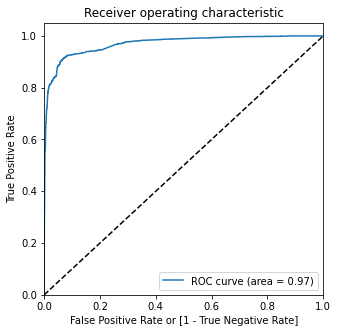

In [344]:
plt.figure(figsize=(10,10))
roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)
plt.show();

#### Inference:
As we have seen that ROC value should have the value close to 1 but here we can see that it is 0.97 which is close to 1.
It clearly indicates that it will be a good model

### Find Optimal Cut off Point

In [345]:
# Let's create columns with different probability cutoffs 
num  = [float(x)/10 for x in range(10)]
for i in num:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.28,9196,0,1,1,1,0,0,0,0,0,0,0
1,0,0.03,4696,0,1,0,0,0,0,0,0,0,0,0
2,0,0.58,3274,1,1,1,1,1,1,1,0,0,0,0
3,0,0.01,2164,0,1,0,0,0,0,0,0,0,0,0
4,1,0.99,1667,1,1,1,1,1,1,1,1,1,1,1


In [346]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num1 = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num1:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)


      prob  accuracy  sensi  speci
0.00  0.00      0.38   1.00   0.00
0.10  0.10      0.82   0.97   0.72
0.20  0.20      0.90   0.93   0.88
0.30  0.30      0.92   0.92   0.93
0.40  0.40      0.93   0.90   0.94
0.50  0.50      0.93   0.88   0.95
0.60  0.60      0.92   0.83   0.97
0.70  0.70      0.92   0.81   0.98
0.80  0.80      0.91   0.77   0.99
0.90  0.90      0.89   0.72   0.99


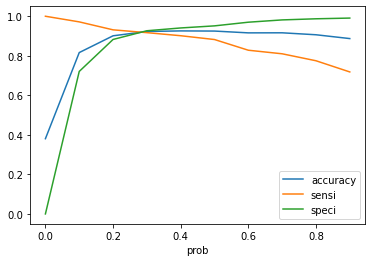

In [347]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()


In [348]:
#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.28,9196,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.03,4696,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.58,3274,1,1,1,1,1,1,1,0,0,0,0,1
3,0,0.01,2164,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.99,1667,1,1,1,1,1,1,1,1,1,1,1,1


In [349]:
#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.28,9196,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.03,4696,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.58,3274,1,1,1,1,1,1,1,0,0,0,0,1
3,0,0.01,2164,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.99,1667,1,1,1,1,1,1,1,1,1,1,1,1


In [350]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,1,0.28,9196,0,28
1,0,0.03,4696,0,3
2,0,0.58,3274,1,58
3,0,0.01,2164,0,1
4,1,0.99,1667,1,99


In [351]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.922929631402585

In [352]:
confusion_2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion_2

array([[3597,  285],
       [ 198, 2187]], dtype=int64)

In [353]:

TP = confusion_2[1,1] # true positive 
TN = confusion_2[0,0] # true negatives
FP = confusion_2[0,1] # false positives
FN = confusion_2[1,0] # false negatives

In [354]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9169811320754717

In [355]:
# Let us calculate specificity
TN / float(TN+FP)


0.9265842349304482

### Inference:
So as we can clearly notice that the above model is performing well. The ROC curve also shows a value of of 0.97, which is very good value. Now we have found the following values for the Train Data:

- Accuracy : 92.30%
- Sensitivity : 91.7%
- Specificity : 92.66%  

In [356]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))


0.07341576506955177


In [357]:
# Positive predictive value 
print (TP / float(TP+FP))


0.8847087378640777


In [358]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9478260869565217


In [359]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[3597,  285],
       [ 198, 2187]], dtype=int64)

In [360]:
##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8847087378640777

In [361]:

##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.9169811320754717

In [362]:
#importing the libraries

from sklearn.metrics import precision_score, recall_score

In [363]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.8847087378640777

In [364]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9169811320754717

In [365]:
#importing the libraries

from sklearn.metrics import precision_recall_curve

In [366]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

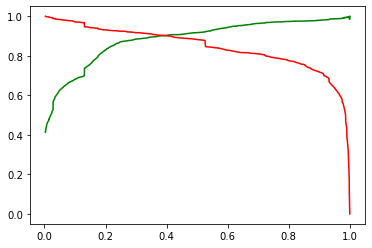

In [367]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

##### Inference for Accuracy, Sensitivity, and Specificity Trade-Off:
1. From the curve above, 0.3 is the optimum point to take it as a cutoff probability


In [368]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specialization,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
7681,0.58,-0.31,0.09,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
984,-0.09,-0.55,0.36,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
8135,-0.42,0.81,-0.17,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6915,0.24,-0.63,-0.17,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2712,-0.09,-0.42,0.36,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [369]:
X_test = X_test[rfe_support_col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Welingak Website,Last Activity_SMS Sent,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
7681,-0.31,0,1,0,1,0,0,0,0,0,0,1,0
984,-0.55,0,0,0,1,1,0,0,0,0,1,0,0
8135,0.81,0,1,0,1,0,0,0,0,0,0,0,0
6915,-0.63,0,0,0,0,0,0,0,0,0,0,1,0
2712,-0.42,0,0,0,0,0,0,0,0,0,0,0,1


In [370]:
X_test_sm = sm.add_constant(X_test)

## Now we will predict using the Test Data Set

In [371]:
y_test_pred = res.predict(X_test_sm)

In [372]:
y_test_pred[:10]

7681   0.02
984    0.03
8135   0.69
6915   0.01
2712   0.95
244    0.00
4698   0.01
8287   0.03
6791   0.98
8970   0.01
dtype: float64

In [373]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [374]:
# Let's see the head
y_pred_1.head()

,0
7681,0.02
984,0.03
8135,0.69
6915,0.01
2712,0.95


In [375]:
# Converting y_test to dataframe
y_test_leads = pd.DataFrame(y_test)

In [376]:
y_test_leads['Prospect ID'] = y_test_leads.index

In [377]:
# Removing index for both dataframes to appended it side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_leads.reset_index(drop=True, inplace=True)

In [378]:
# Appending y_test_leads and y_pred_1
y_pred_final = pd.concat([y_test_leads, y_pred_1],axis=1)

In [379]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,7681,0.02
1,0,984,0.03
2,0,8135,0.69
3,0,6915,0.01
4,1,2712,0.95


In [380]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [381]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,7681,0.02
1,0,984,0.03
2,0,8135,0.69
3,0,6915,0.01
4,1,2712,0.95


In [382]:

# Now we will be Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [383]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,7681,0,0.02,2
1,984,0,0.03,3
2,8135,0,0.69,69
3,6915,0,0.01,1
4,2712,1,0.95,95


In [384]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [385]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,7681,0,0.02,2,0
1,984,0,0.03,3,0
2,8135,0,0.69,69,1
3,6915,0,0.01,1,0
4,2712,1,0.95,95,1


In [386]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9277736411020104

In [387]:
confusion_2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion_2

array([[1563,  113],
       [  81,  929]], dtype=int64)

In [389]:
TP = confusion_2[1,1] # true positive 
TN = confusion_2[0,0] # true negatives
FP = confusion_2[0,1] # false positives
FN = confusion_2[1,0] # false negatives

In [390]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9198019801980198

In [391]:
# Let us calculate specificity
TN / float(TN+FP)

0.9325775656324582

In [392]:
#Precision Score
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.8915547024952015

In [393]:
#Recall Score
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9198019801980198

In [398]:
#Accuracy
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9277736411020104

### Inference:
After running the model on the Test Data these are the figures we obtain:
- Sensitivity : 91.98%
- Specificity : 93.26%
- Accuracy    : 92.78%





### Final Observation:
### Now we will be comparing the values obtained from Train & Test Set:

### <u> Train Data: </u>
- Accuracy : 92.29%
- Sensitivity : 91.70%
- Specificity : 92.66%

### <u> Test Data: </u>
- Sensitivity : 91.98%
- Specificity : 93.26%
- Accuracy    : 92.78%